# Frequency of ESRB game rating descriptors in 1,895 games

Import packages *matplotlib*, *numpy*, and *pandas*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Reads the .csv file and creates a list for the descriptors (each gam and one for frequencies

In [3]:
file_csv = pd.read_csv('Video_games_esrb_rating.csv')
rating_num_content = file_csv.iloc[:,2:33]
rating_list = np.array(rating_num_content.transpose().values)
name_list = np.array(file_csv.columns.values[2:33].tolist())

Creates an empty list `column_totals` where each element will be the total sum for each descriptor's frequency. Iterating through each descriptor column, the total of games with that descriptor is calculated and added as an element to the `colunm_totals` list.

In [4]:
column_totals = []
for column in rating_list:
    total = 0
    for rating in column:
        if(rating == 1):
            total += 1
    column_totals.append(total)


Combines the descriptors and totals as sublist pairs `[[desc, freq], [desc, freq]]` and sort by frequency to maintain parallelism when sorting

In [5]:
combined_list = list(zip(name_list, column_totals))
sorted_combined = sorted(combined_list, key= lambda total: total[1])

Extracts the descriptor and frequency elements of each sublist into separate lists for the plot's x and y.

In [6]:
sorted_names = []
sorted_totals = []
for i in range(len(sorted_combined)):
    sorted_names.append(sorted_combined[i][0].replace('_', " "))
    sorted_totals.append(sorted_combined[i][1])

Plots with vertical labels and includes a legend

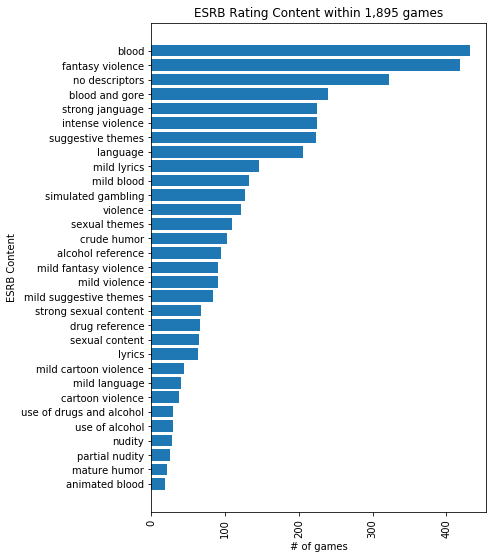

In [43]:
plt.title("ESRB Rating Content within 1,895 games")
plt.xlabel("# of games")
plt.ylabel("ESRB Content")
plt.xticks(rotation='vertical')
plt.barh(sorted_names, sorted_totals, label="Number of games")
plt.rcParams["figure.figsize"] = (12,9)
plt.show()